# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
# Your code here. 
import pandas as pd

x_values = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
y_values = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]

student_data = pd.DataFrame({'X': x_values, 'Y': y_values})
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

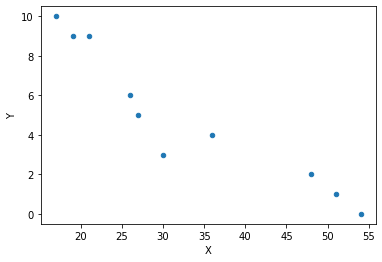

In [3]:
# Your code here.

student_data.plot.scatter(x='X', y='Y');

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
"""
There is a negative correlation between age and number of tardies.
"""

'\nThere is a negative correlation between age and number of tardies.\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
print("Covariance:\n", student_data.cov())

print("Correlation:\n",student_data.corr())
"""
The negative covariance between X and Y indicate that bigger the age the smaller the number of tardies.

The correlation of close to -1 indicates a stong negative correlation 
(ie as Age increases, Tardies decrease)
"""

Covariance:
             X          Y
X  187.655556 -45.566667
Y  -45.566667  12.544444
Correlation:
           X         Y
X  1.000000 -0.939163
Y -0.939163  1.000000


'\nThe negative covariance between X and Y indicate that bigger the age the smaller the number of tardies.\n\nThe correlation of close to -1 indicates a stong negative correlation \n(ie as Age increases, Tardies decrease)\n'

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# Your response here.
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(student_data.X, student_data.Y)
slope, intercept, r_value, p_value, std_err

"""
I am using a linear regression model.
"""

'\nI am using a linear regression model.\n'

Plot your regression model on your scatter plot.

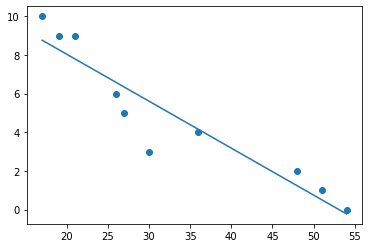

In [7]:
# Your code here.
import matplotlib.pyplot as plt

plt.scatter(student_data.X, student_data.Y)
plt.plot(student_data.X.sort_values(), slope*student_data.X.sort_values() + intercept);

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [8]:
# Your response here. 
"""
The r-value close to -1 indicates a good fit for the linear regression formula
with the data, as well as the small standard error.  This means that the formula predicts
the number of tardies from age within an average error of .03. I am confident that the age of
the student is a good predictor for the number of tardies (in most cases).
"""

'\nThe r-value close to -1 indicates a good fit for the linear regression formula\nwith the data, as well as the small standard error.  This means that the formula predicts\nthe number of tardies from age within an average error of .03. I am confident that the age of\nthe student is a good predictor for the number of tardies (in most cases).\n'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [9]:
# Import any libraries you may need & the data

vehicles = pd.read_csv("vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [10]:
# Your response here. 
vx_values = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]

corr = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile']].corr()['CO2 Emission Grams/Mile']

print(corr)
"""
The Fuel Barrel/Year will be the most important as it's absolute value is closes to 1

The Year provides the least helpful information for determining the CO2 emissions, as it's
absolute value is the smallest.

"""

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64


"\nThe Fuel Barrel/Year will be the most important as it's absolute value is closes to 1\n\nThe Year provides the least helpful information for determining the CO2 emissions, as it's\nabsolute value is the smallest.\n\n"

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [11]:
# Your response here. 
import statsmodels.api as sm

X = sm.add_constant(vx_values) # adding a constant
Y = vehicles['CO2 Emission Grams/Mile']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [12]:
# Your response here. 
print(model.summary())

"""
The large coefficient relative to the other variables for Fuel/Barrels indicates that it has 
a major impact on the CO2 emissions. The r-squared is close to 1, but the f-statistic is quite large.
"""

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                             10:52:11   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

'\nThe large coefficient relative to the other variables for Fuel/Barrels indicates that it has \na major impact on the CO2 emissions. The r-squared is close to 1, but the f-statistic is quite large.\n'

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [13]:
# Your code here. 
x_list = [1,3,4,6,8,9,11,14]
y_list = [1,2,4,4,5,7,8,13]

bonus_df = pd.DataFrame({'X': x_list, 'Y': y_list})

bonus_df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

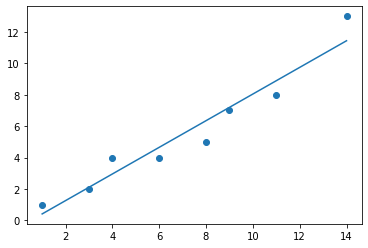

In [14]:
# Your code here.
#slope, intercept, r_value, p_value, std_err = linregress(student_data.X, student_data.Y)
result = linregress(bonus_df.X, bonus_df.Y)
plt.scatter(bonus_df.X, bonus_df.Y)
plt.plot(bonus_df.X.sort_values(), result[0]*bonus_df.X.sort_values() + result[1]);

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [15]:
# Your response here. 
"""
X and Y have a strong positive correlation, and an apparent linear relatoinship.
"""
print(result)


LinregressResult(slope=0.8484848484848485, intercept=-0.43939393939393945, rvalue=0.9652303546573691, pvalue=0.00010236374464090686, stderr=0.09380896778286217)


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

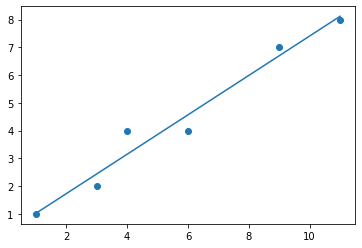

In [19]:
# Your response here. 
# Let's define outliers by how far they are from my fitted line
bonus_df['predicted'] = result[0]*bonus_df.X + result[1]
bonus_df['error'] = abs(bonus_df['Y'] - bonus_df['predicted'])

# decided to keep anything with error less than 1.25
new_df = bonus_df[bonus_df['error'] < 1.25]

result_2 = linregress(new_df.X, new_df.Y)
plt.scatter(new_df.X, new_df.Y)
plt.plot(new_df.X.sort_values(), result_2[0]*new_df.X.sort_values() + result_2[1]);

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [26]:
# Your response here.

"""
The slope flattened a little bit, and the intercept also changed.  The rvalue increased slightly,
but the standard error decreased a bit. Overall, it's a slightly better fit.
"""
stats = pd.DataFrame({'Before': result, 'After': result_2}, index = ['slope','int','rvalue',\
                                                                     'pvalue', 'std-err'])
stats

,Before,After
slope,0.848485,0.710280
int,-0.439394,0.308411
rvalue,0.965230,0.981811
pvalue,0.000102,0.000493
std-err,0.093809,0.068677
